In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

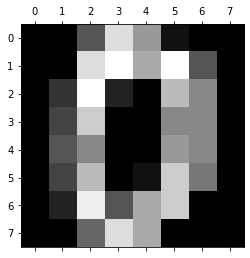

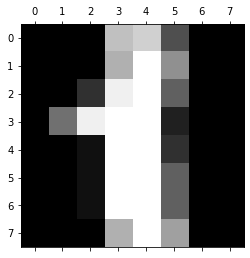

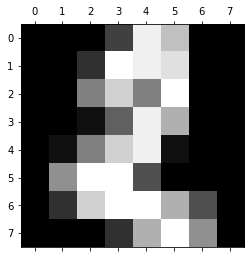

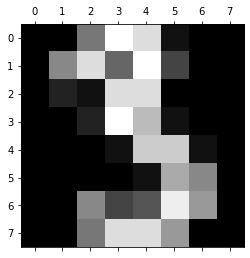

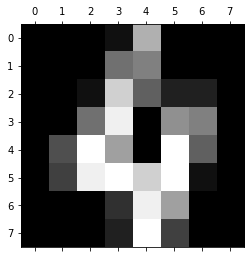

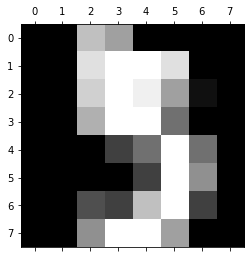

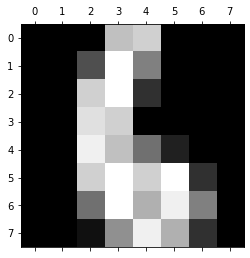

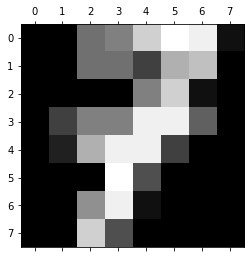

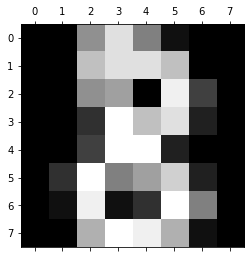

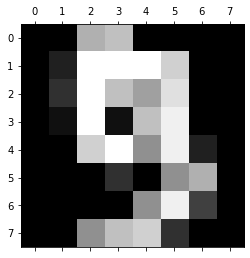

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [5]:
df=pd.DataFrame(digits.data)
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.drop(columns=['target']), digits.target, test_size=0.2)

In [7]:
len(x_train)

1437

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
model.score(x_test, y_test)

0.9583333333333334

In [21]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 34,  0,  1,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 38]], dtype=int64)

Text(69.0, 0.5, 'truth')

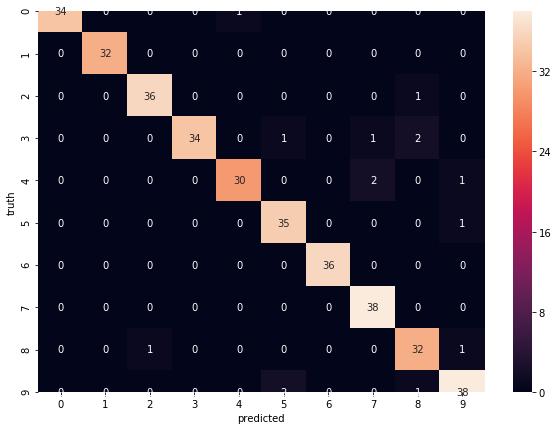

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')